In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import importlib
import pandas as pd
import pickle
import matplotlib.gridspec as gridspec
import sys
import time
sys.path.append('../code')
import sirs
import params
import plotting
import stability

from scipy.linalg import eigvals


plotting.set_rcParams()

Largest EW: -0.006136363636363637


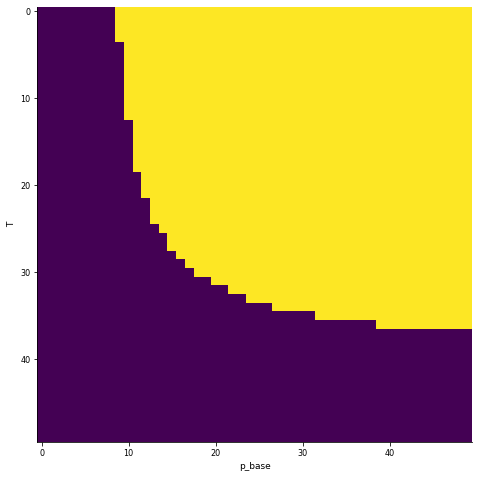

In [3]:

T_ranger5 = np.linspace(1,60, num = 50)
p_base_ranger5 = np.linspace(0.01, 0.25, num=50)

karte = np.zeros((len(T_ranger5), len(p_base_ranger5)))
importlib.reload(params)
p = params.p

for n,T in enumerate(T_ranger5):
    for m,p_b in enumerate(p_base_ranger5):
        p['pbase'] = p_b
        p['tau'] = T

        EW = stability.largestEW(p)
        if EW >= 0:
            karte[m,n]=1 #>=0
        else:
            karte[m,n]=0
            
print('Largest EW:',EW)
plt.figure(figsize=(8,8))
plt.imshow(karte)
plt.xlabel("p_base")
plt.ylabel("T")
#plt.yticks([0,100,200], [100,50,0])
#plt.xticks([0,67, 133, 200], [0.01,0.12,0.24,0.35])
plt.savefig("JoelModel.png")

Largest EW: 0.012379515728986244


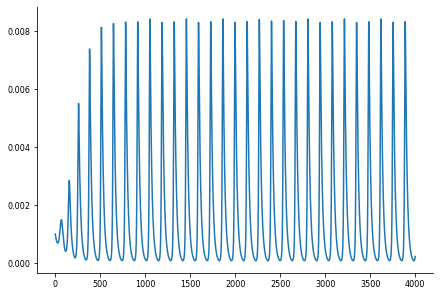

In [12]:
importlib.reload(params)

axs = plotting.createfig()

p = params.p
p['y0'][-1]=0.001
p['y0'][-2]=0.001
p['pbase'] = 0.1
p['tau'] = 40
p['s'] = 0

EW = stability.largestEW(p)
print('Largest EW:',EW)

m = sirs.model(**p)
m.tmax = 4000
t,d,e,te = m.run()
axs[0].plot(m.times,m.data[1,:])

In [4]:
p

{'y0': [0.999, 0.001, 0, 0.001, 0.001],
 'beta': 0.5,
 'gamma': 0.1,
 'nu': 0.01,
 'tau': 45,
 'pbase': 0.17,
 'pcap': 0.001,
 'pepsilon': 0.0001,
 's': 0.2,
 'w': 0.017453292519943295,
 'tmin': 0,
 'tmax': 3000,
 'stepsize': 0.1,
 'maxstep': 10,
 'direction': True,
 'threshold': 0.003}

T in the thesis is called tau here. Direction tells the solver if he should only look for peaks or also lows of the timeseries. To access the peaks and the times at which peaks occur do the following: 

In [5]:
m.t_events[0]

array([ 107.98541951,  275.23378361,  393.0715435 ,  668.39489957,
        844.62301619, 1002.77665784, 1127.50064871, 1391.5526152 ,
       1574.72421808, 1714.81193599, 1828.79661551, 2105.10351411,
       2274.58551456, 2451.26466955, 2590.27774472, 2831.0427328 ,
       3012.82655994, 3156.14346677, 3271.98432457, 3546.87704902,
       3719.93366785, 3886.76063902])

In [6]:
m.events[0][:,1]

array([0.00174178, 0.00236071, 0.00416123, 0.00456393, 0.00193489,
       0.00269429, 0.00411862, 0.00477612, 0.00159056, 0.00212224,
       0.00393946, 0.00430359, 0.00231288, 0.00325083, 0.00374321,
       0.00470279, 0.00165244, 0.00223058, 0.00401858, 0.00445015,
       0.00210515, 0.00295574])